In [1]:
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt

To achieve our image compression, we need to implement this step by step:

- SVD
- SVD Truncation
- Matrix Padding
- Rebuild image

Consider an image as a matrix of numerical values, where each element represents a pixel. In the context of black-and-white images, the matrix consists of grayscale intensities within the range [0, 255]. For RGB (Red, Green, Blue) images, the image is represented as a tensor of three matrices, each matrix corresponding to the intensity values of one color channel.

For example, a black x cross would look like this:

\begin{bmatrix}
  255 & 0 & 0 & 0 & 255 \\
  0 & 255 & 0 & 255 & 0 \\
  0 & 0 & 255 & 0 & 0 \\
  0 & 255 & 0 & 255 & 0 \\
  255 & 0 & 0 & 0 & 255 \\
\end{bmatrix}

And a RGB purple x cross like this:


\begin{array}{ccc}
\begin{bmatrix}
    255 & 0 & 0 & 0 & 255 \\
    0 & 255 & 0 & 255 & 0 \\
    0 & 0 & 255 & 0 & 0 \\
    0 & 255 & 0 & 255 & 0 \\
    255 & 0 & 0 & 0 & 255 \\
\end{bmatrix}
&
\begin{bmatrix}
    0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
&
\begin{bmatrix}
    255 & 0 & 0 & 0 & 255 \\
    0 & 255 & 0 & 255 & 0 \\
    0 & 0 & 255 & 0 & 0 \\
    0 & 255 & 0 & 255 & 0 \\
    255 & 0 & 0 & 0 & 255 \\
\end{bmatrix}
\end{array}


Here is a real example of the "Quijote" image

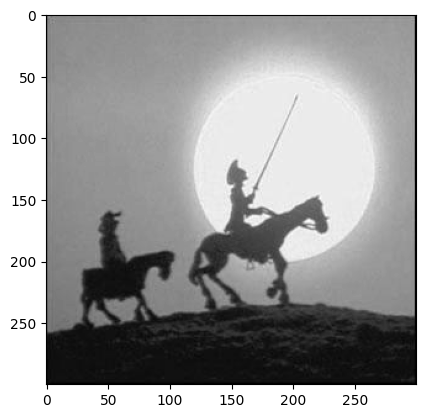

In [2]:
image = imageio.imread("quijote.jpg")
plt.imshow(image, cmap='gray')

And then its matrix

In [3]:
print(image)

[[  0  30   0 ...   1  23   0]
 [ 17 131 141 ... 144 137  31]
 [  0 135 153 ... 159 148   0]
 ...
 [  4  10  17 ...  33  25   8]
 [  5  10  14 ...  20  16   4]
 [  3   5   7 ...   7   6   0]]


Let $I$ be the image matrix to be decomposed using Singular Value Decomposition (SVD). The SVD of $I$ can be expressed as:

$I = UΣV^T$ 

where:

* $U$ and $V$ are orthogonal matrices with columns forming orthonormal vectors.
* $Σ$ is a diagonal matrix with singular values, representing the importance of corresponding vectors in $U$ and $V^T$.

In image decomposition, $U$ and $V^T$ capture basis vectors, and $Σ$ contains the importance (strength) of each vector. Larger singular values correspond to more significant features or patterns in the image. Keeping only dominant components allows for an efficient representation of the image while preserving its essential features and supporting compression. 

So, the compression percentage of the image will be linked to the percentage of singular values we use in the decomposition.

For further information check for [documentation](https://en.wikipedia.org/wiki/Singular_value_decomposition)

For decomposing the image, we just use the numpy function np.linalg.svd 

In [4]:
U, s, Vt = np.linalg.svd(image)

As mentioned previously, the compression percentage of the image is directly tied to the proportion of singular values included in the decomposition. Given that the singular values in $Σ$ correspond to the rank of our matrix, determining the compression percentage involves calculating the number of singular values that represent the specified percentage. Subsequently, the decomposition is truncated accordingly.

Lets do for example a compression to 8%

In [5]:
percentage = 8
rank = round( len(s) * (int(percentage) / 100) )
rank

24

Now we should truncate our decomposition to rank 24

In [6]:
U_truncated = U[:,:rank]
Vt_truncated = Vt[:rank]
s_truncated = s[:rank]

We aim to reconstruct our matrix while maintaining its original size, albeit compressed to 8%. To achieve this, we must pad the matrix to its initial dimensions by appending zeros.

In [7]:
n, m = image.shape

U_padded = np.pad(U_truncated, ((0, n - U_truncated.shape[0]), (0, n - U_truncated.shape[1])), mode='constant')

Vt_padded = np.pad(Vt_truncated, ((0, m - Vt_truncated.shape[0]), (0, m - Vt_truncated.shape[1])), mode='constant')

Z_padded = np.zeros((n, m))
Z_padded[:s_truncated.shape[0], :s_truncated.shape[0]] = np.diag(s_truncated)

image_padded = U_padded @ Z_padded @ Vt_padded

And there we have it!

Text(0.5, 1.0, 'Image compressed to 8%')

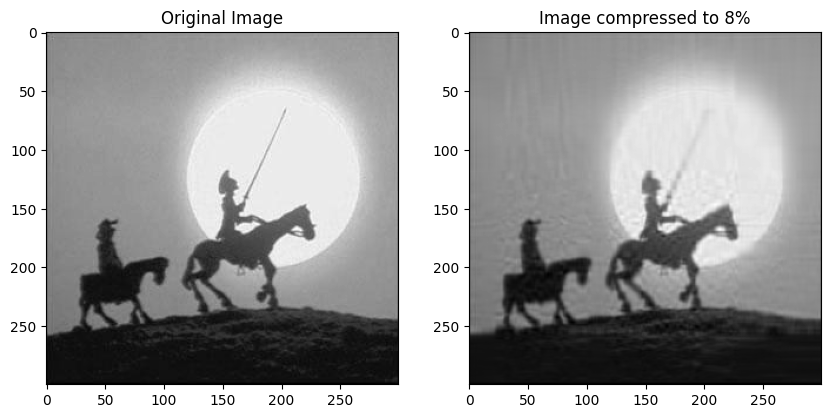

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(image_padded, cmap='gray')
axes[1].set_title('Image compressed to {}%'.format(percentage))

For RGB images, we just need to do all the same steps for the 3 channels (matrixes).

Thanks for reading!